# <span style = "color: lightblue"> Glass Classification </span>

***

This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

### <span style = "color : blue"> Content </span>

* Id number: 1 to 214 (removed from CSV file)
* RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
* Type of glass: (class attribute)
    1. --  buildingwindowsfloatprocessed
    2. --  buildingwindowsnonfloatprocessed
    3. --  vehiclewindowsfloatprocessed
    4. --  vehiclewindowsnonfloatprocessed (none in this database)
    5. --  containers
    6. --  tableware
    7. --  headlamps

### Let's Dive into it

### Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read 'glass.csv' dataset and store it in a DataFrame

In [2]:
df = pd.read_csv('glass.csv')

### View the top 5 rows

In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


### View info 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


### View basic statistical information

In [5]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


### Check for any null values

In [6]:
df.isna().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

## <span style = "color:orange">Visualization</span>

### Plot a countplot of the Type of Glass

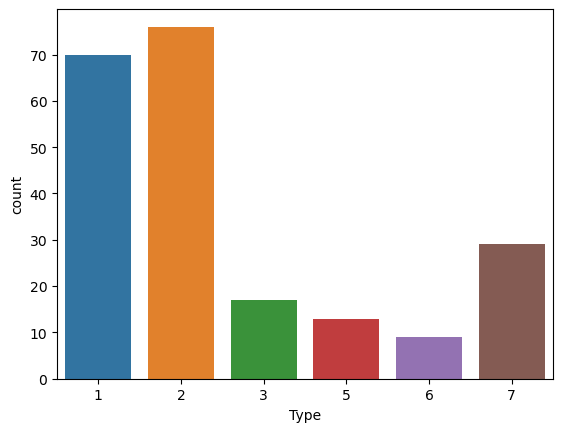

In [7]:
sns.countplot(x = df['Type'])
plt.show()

### Plot a heatmap to view the correlation between features and Type

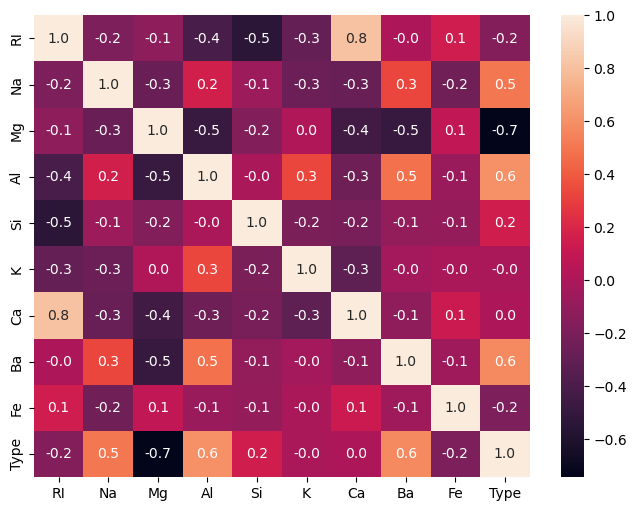

In [8]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(), annot = True, fmt = '.1f')
plt.show()

### Split the dataset into input and Target variables

In [9]:
X = df.drop(columns = ['Type'])
y = df['Type']

### Carry out Feature scaling using Standard Scaler

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()

In [12]:
xcolumns = X.columns

In [13]:
X = scaler.fit_transform(X)

In [14]:
X = pd.DataFrame(X, columns = xcolumns)

In [15]:
X.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


### Split the dataset into training and testing set

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.25, random_state = 100)

### Create Gaussian Naive Bayes model and Train it

In [18]:
from sklearn.naive_bayes import GaussianNB

In [19]:
model = GaussianNB()

In [20]:
#Train the models
model.fit(X_train, y_train)

GaussianNB()

### Check the score of our model

In [21]:
model.score(X_train, y_train)

0.56875

### Make predictions using X_test

In [22]:
y_pred = model.predict(X_test)

### Check the accuracy score of our prediction

In [23]:
from sklearn import metrics

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.3888888888888889

### Create confusion matrix

In [25]:
metrics.confusion_matrix(y_test, y_pred)

array([[10,  0,  3,  0,  0,  0],
       [16,  0,  4,  1,  2,  0],
       [ 2,  0,  1,  0,  0,  0],
       [ 0,  4,  0,  1,  0,  1],
       [ 0,  0,  0,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7]], dtype=int64)

### Plot confusion matrix

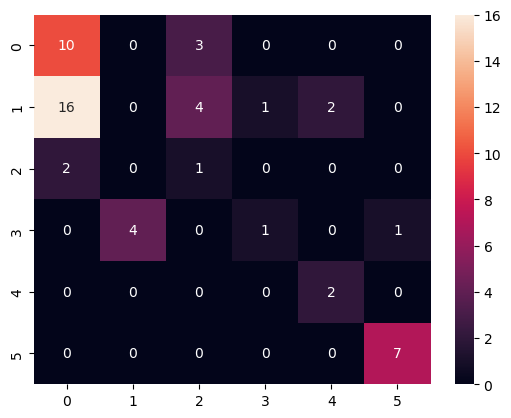

In [26]:
sns.heatmap(metrics.confusion_matrix(y_test,y_pred), annot = True)
plt.show()

### Create classification report

In [43]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.36      0.77      0.49        13
           2       0.00      0.00      0.00        23
           3       0.12      0.33      0.18         3
           5       0.50      0.17      0.25         6
           6       0.50      1.00      0.67         2
           7       0.88      1.00      0.93         7

    accuracy                           0.39        54
   macro avg       0.39      0.54      0.42        54
weighted avg       0.28      0.39      0.30        54



***

# <center><span style = "color:CornflowerBlue; font-family:Courier New;font-size:40px">EDURE LEARNING</span></center>